In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')

In [33]:
#load data
df = pd.read_csv('/media/ruairi/UBUNTU/db/perfection.csv')

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
from sklearn.preprocessing import StandardScaler

def mapper(row, m):
    return row['firing_rate'] / m[row['hc_cluster']]


def normalise(df):
    
    mfr = df[df['time']<=0].groupby('hc_cluster')['firing_rate'].mean()
    m = {mfr.index[i]: mfr.iloc[i] for i in range(len(mfr))}
    return df.apply(mapper, m=m, axis=1)


def normalise2(df):
    return df.groupby('neuron_id')['firing_rate'].apply(lambda x: x.divide(np.mean(x.iloc[:len(x)//2])).multiply(100))

def normalise_z(df):
    scaler = StandardScaler()
    def _scale(col):
        scaler.fit(col[col['time'] <= 0]['firing_rate'])
        return pd.Series(scaler.transform(col))
    return df.groupby('neuron_id').apply(_scale)

## CITALOPRAM

In [35]:
#cit
cit = df[df['experiment_name']=='CIT_WAY'].copy()

#average response on each cluster
cit['normalised'] = normalise2(cit)


### Average Effect Across All Neurons

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Average Response By Cluster')

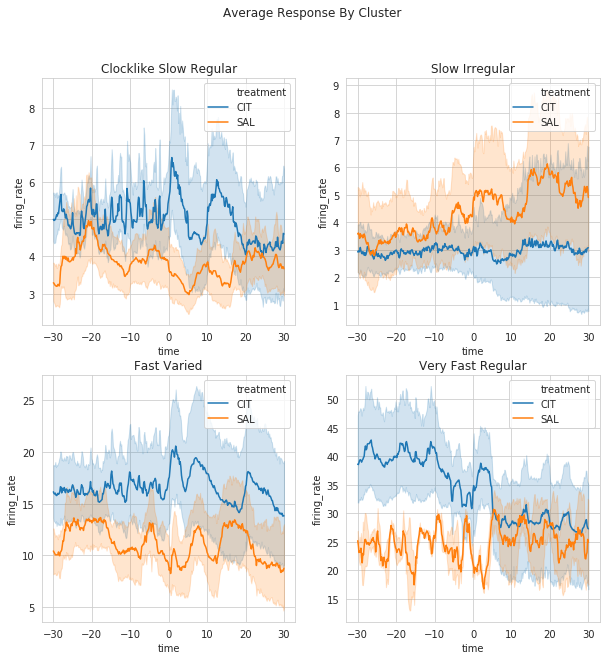

In [26]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


for i, cat in enumerate(cit['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=cit[(cit["hc_cluster"]==cat) & (cit['response'] != 'excluded')], 
                 x='time', y='firing_rate', 
                 hue='treatment', ax=a.flatten()[i], hue_order=['CIT', 'SAL'])
    ax.set_title(f'{cat}')
f.suptitle('Average Response By Cluster')

### INHIBITED NEURONS

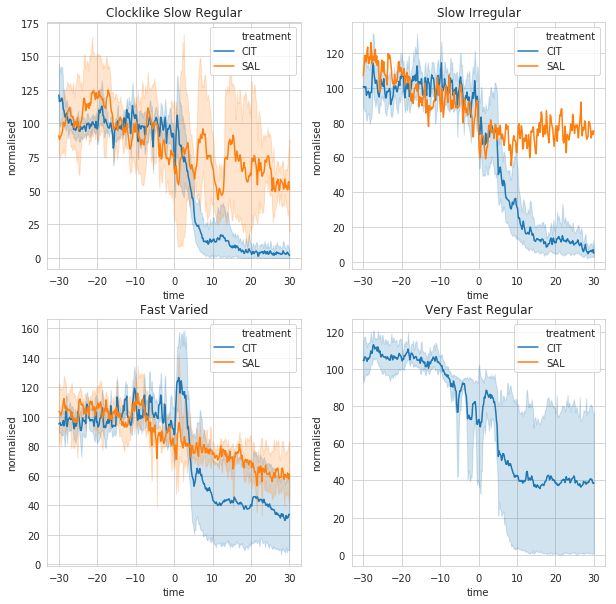

In [6]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(cit['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=cit[(cit["hc_cluster"]==cat) & (cit['response'] == 'decrease')], 
                 x='time', y='normalised', 
                 hue='treatment', ax=a.flatten()[i], hue_order=['CIT', 'SAL'])
    ax.set_title(f'{cat}')

### ACTIVATED NEURONS

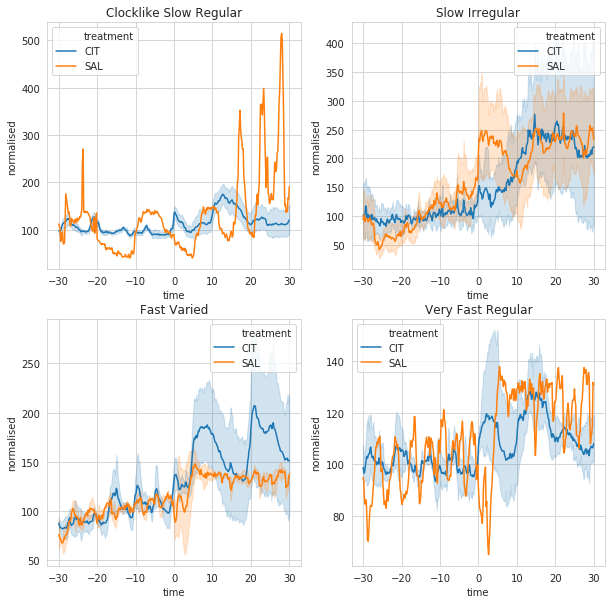

In [7]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(cit['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=cit[(cit["hc_cluster"]==cat) & (cit['response'] == 'increase')], 
                 x='time', y='normalised', 
                 hue='treatment', ax=a.flatten()[i], hue_order=['CIT', 'SAL'])
    ax.set_title(f'{cat}')

## SERT DREADD

### Average Effect Across All Neurons

In [8]:

sert = df[df['experiment_name']=='SERT_DREADD'].copy()

sert['normalised'] = normalise2(sert)

### Average Effect Across All Neurons

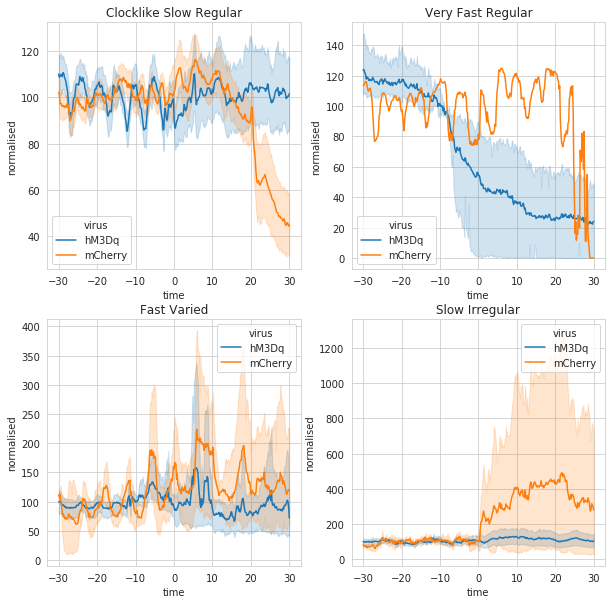

In [9]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


for i, cat in enumerate(sert['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=sert[(sert["hc_cluster"]==cat) & (sert['response'] != 'excluded')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i], hue_order=['hM3Dq', 'mCherry'])
    ax.set_title(f'{cat}')### Average Effect Across All Neurons

### INHIBITED NEURONS

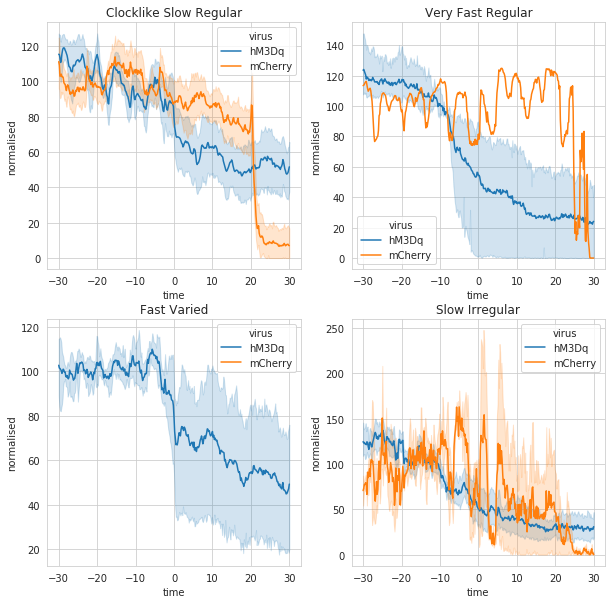

In [10]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(sert['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=sert[(sert["hc_cluster"]==cat) & (sert['response'] == 'decrease')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i], hue_order=['hM3Dq', 'mCherry'])
    ax.set_title(f'{cat}')

### ACTIVATED NEURONS

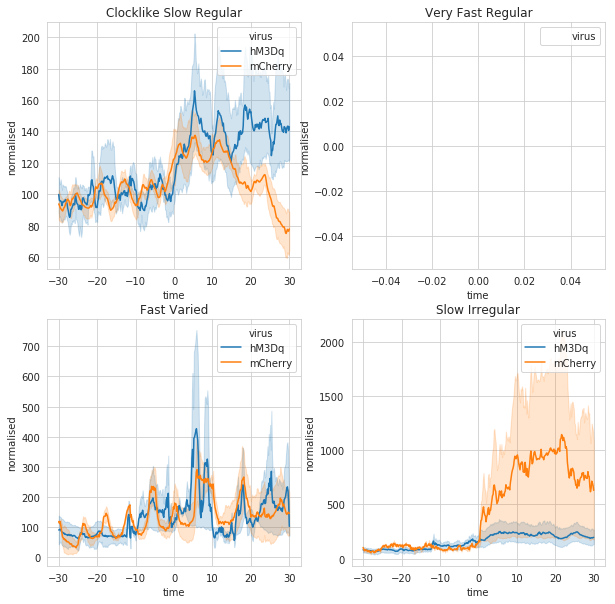

In [11]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(sert['hc_cluster'].unique()):
    # average response of responders
    ax = sns.lineplot(data=sert[(sert["hc_cluster"]==cat) & (sert['response'] == 'increase')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i], hue_order=['hM3Dq', 'mCherry'])
    ax.set_title(f'{cat}')

## vGAT DREADD

In [12]:
gat = df[df['experiment_name']=='GAT_DREADD'].copy()

gat['normalised'] = normalise2(gat)

### Average Effect Across All Neurons

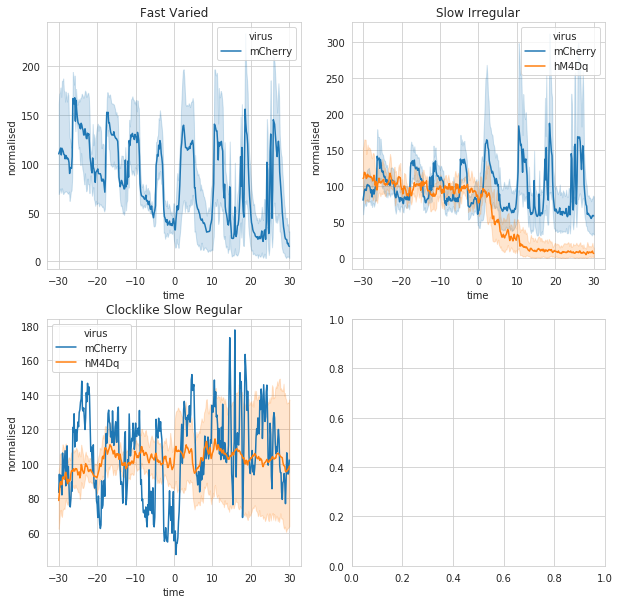

In [13]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


for i, cat in enumerate(gat['hc_cluster'].unique()):

    ax = sns.lineplot(data=gat[(gat["hc_cluster"]==cat) & (gat['response'] != 'excluded')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i], )
    ax.set_title(f'{cat}')

### INHIBITED NEURONS

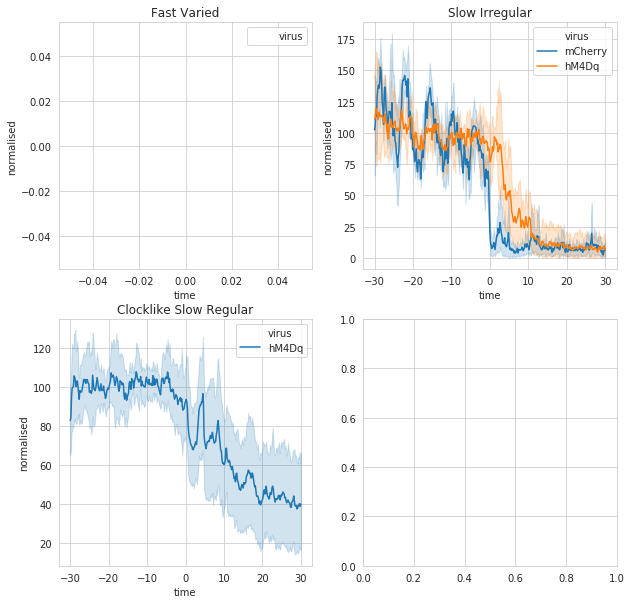

In [14]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(gat['hc_cluster'].unique()):
    
    ax = sns.lineplot(data=gat[(gat["hc_cluster"]==cat) & (gat['response'] == 'decrease')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i],)
    ax.set_title(f'{cat}')

### ACTIVATED NEURONS

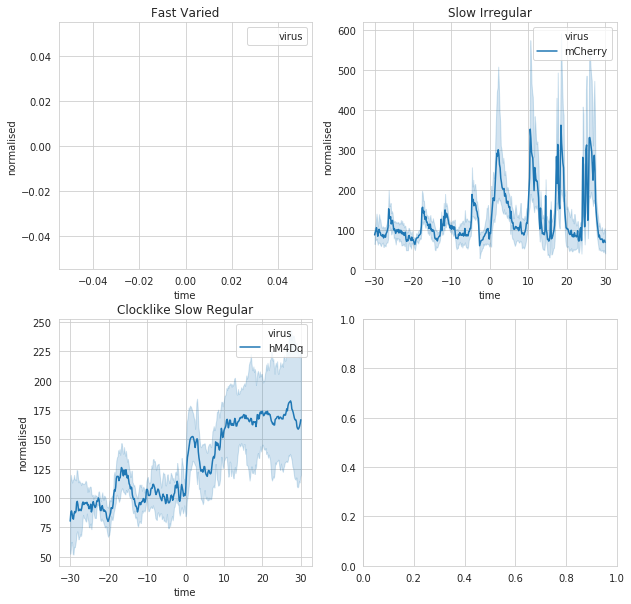

In [15]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, cat in enumerate(gat['hc_cluster'].unique()):
    
    ax = sns.lineplot(data=gat[(gat["hc_cluster"]==cat) & (gat['response'] == 'increase')], 
                 x='time', y='normalised', 
                 hue='virus', ax=a.flatten()[i],)
    ax.set_title(f'{cat}')